# <span style="color:green"> Laboratorio di Simulazione Numerica </span>
## <span style="color:blue">  Esercitazione 6</span>


Il modello di Ising rappresenta un materiale magnetico come un reticolo, dove in ogni sua cella è posizionato uno spin che può assumere i valori $\pm$ 1; l'hamiltoniana del sistema è rappresentata da 
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

dove $\{ s_i \}_{i=1,N}$ sono i possibili valori che lo spin può assumere, $J>0$ (modello ferromagnetico), e assumendo $s_{N+1} = s_{1}$, così da imporre le condizioni al contorno come abbiamo fatto per un reticolo di dimensione finita nell'esercitazione 4 ed eliminare gli effetti di bordo.

La funzione di partizione per $N$ spin, $Z$, può essere calcolata analiticamento nel caso 1D:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

con
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
e $\beta=\frac{1}{k_b T} = \frac{1}{T}$.

Vogliamo ora indagare in che stato si trova il nostro sistema, la risposta varierà al variare della temperatura. 

Per rispondere a questa domanda senza risolvere analiticamente il problema è possibile usare 
1. l'algoritmo di metropolis che consiste nel provare a modificare lo stato di partenza girando un solo spin, confrontato l'energia di partenza e l'energia modificata: se la seconda è minore della prima allora lo stato proposto è energeticamente favorito e viene quindi effettuato il cambiamento, nel caso opposto invece il cambiamento viene effettuato con probabilità pari al rapporto delle probabilità di trovarsi nei due stati $ [e^{-\beta (E_{new}- E_{old})}] $, dove $ E_{new/old}= -J s_i (s_{i+1}+ s_{i-1})-h s_i $ tiene conto solo dell'interazione con i primi vicini.                        
In questo modo il sistema dopo una fase di equilibrazione converge allo stato in cui il sistema si deve trovare a una data temperatura. Lo stato iniziale da cui far partire l'evoluzione del nostro sistema è, in questo e in molti altri casi, ininfluente; è stato quindi scelto di partire dallo stato in cui tutti gli spin sono allineati (verso l'alto) cosicchè il sistema si trovi già vicino allo stato in cui ci si aspetta di trovarlo a T=0 dove vogliamo far partire la nostra simulazione (cfr i tempi di equilibrazione sotto riportati)
2. il metodo di gibbs è un algoritmo metropolis in cui la mossa proposta viene sempre accettata, il valore dello spin dello spin viene campionato secondo la probabilità $ \frac{1} {1+e^{-\beta (E_{down}-E_{up})}} $.

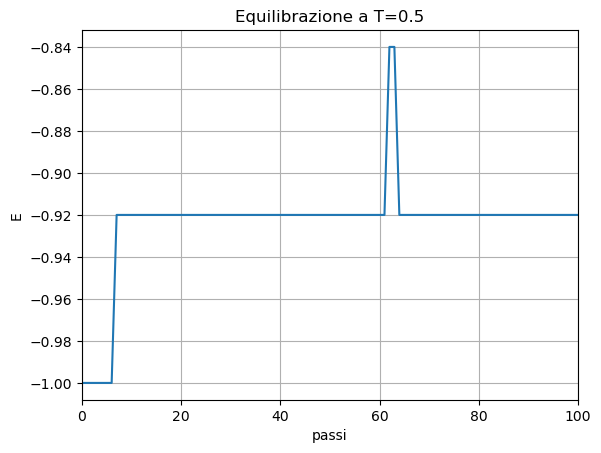

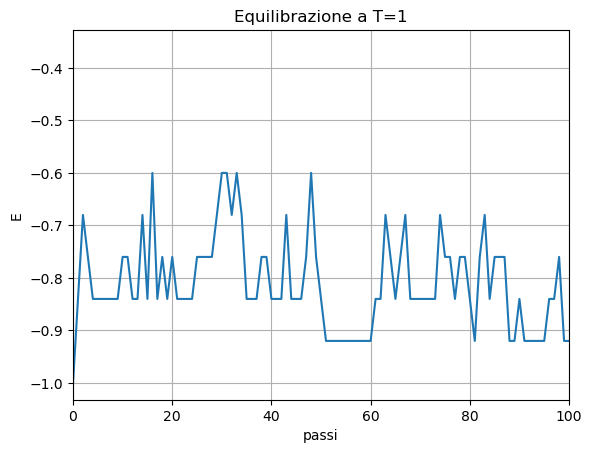

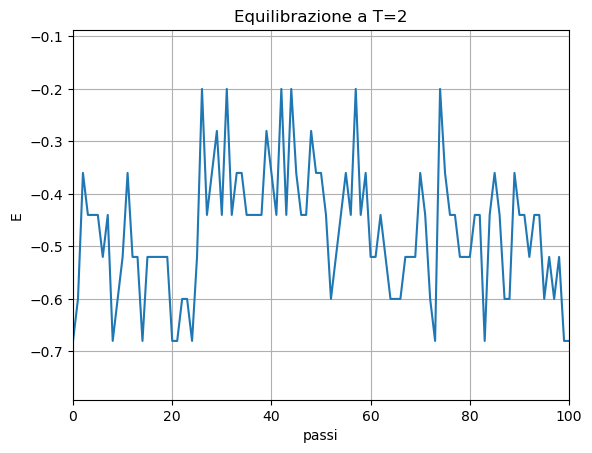

In [54]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(500)

# Carica i dati dal file
data = np.loadtxt('equilibrazione/output.ene1.0')

plt.plot(x,data[:,1])
plt.xlabel('passi')
plt.ylabel('E')
plt.grid(True)
plt.xlim(0,100)
plt.title('Equilibrazione a T=0.5')
plt.show()

x = np.arange(500)

# Carica i dati dal file
data = np.loadtxt('equilibrazione/output.ene2.0')

plt.plot(x,data[:,1])
plt.xlim(0,100)
plt.xlabel('passi')
plt.ylabel('E')
plt.grid(True)
plt.title('Equilibrazione a T=1')
plt.show()

x = np.arange(500)

# Carica i dati dal file
data = np.loadtxt('equilibrazione/output.ene3.0')

plt.plot(x,data[:,1])
plt.xlabel('passi')
plt.ylabel('E')
plt.grid(True)
plt.title('Equilibrazione a T=2')
plt.xlim(0,100)
plt.show()


Lavorando a basse temperature e partendo da una configurazione di spin allineati i passi richiesti per l'equilibrazione sono nell'ordine di qualche decina, le misure effettuate di seguito sono eseguite dopo aver fatto evolvere il sitema per 500 passi.

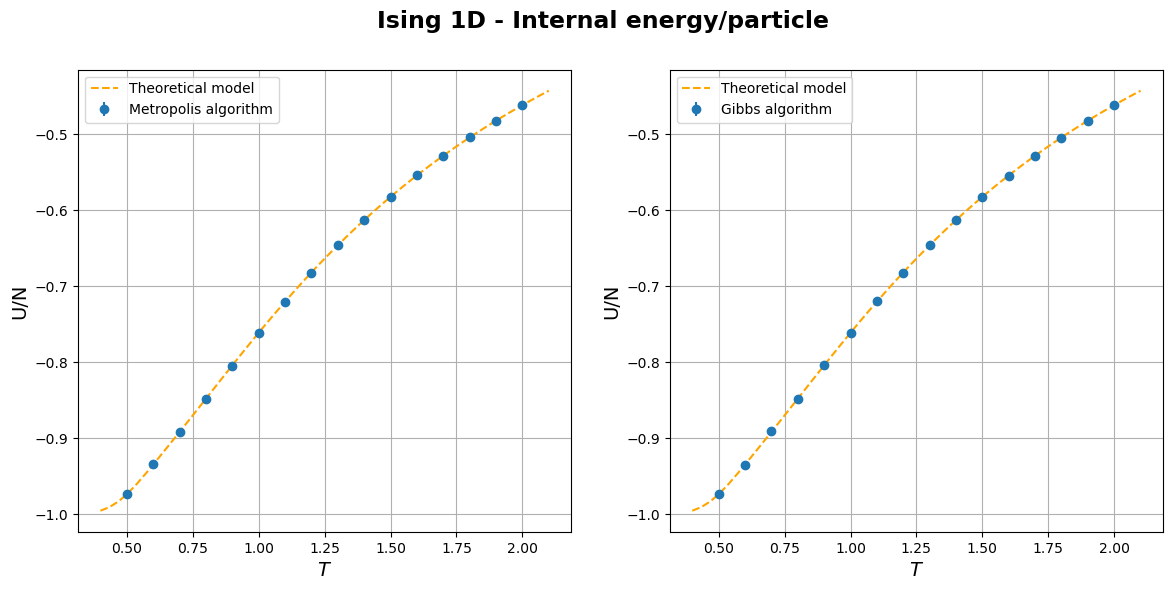

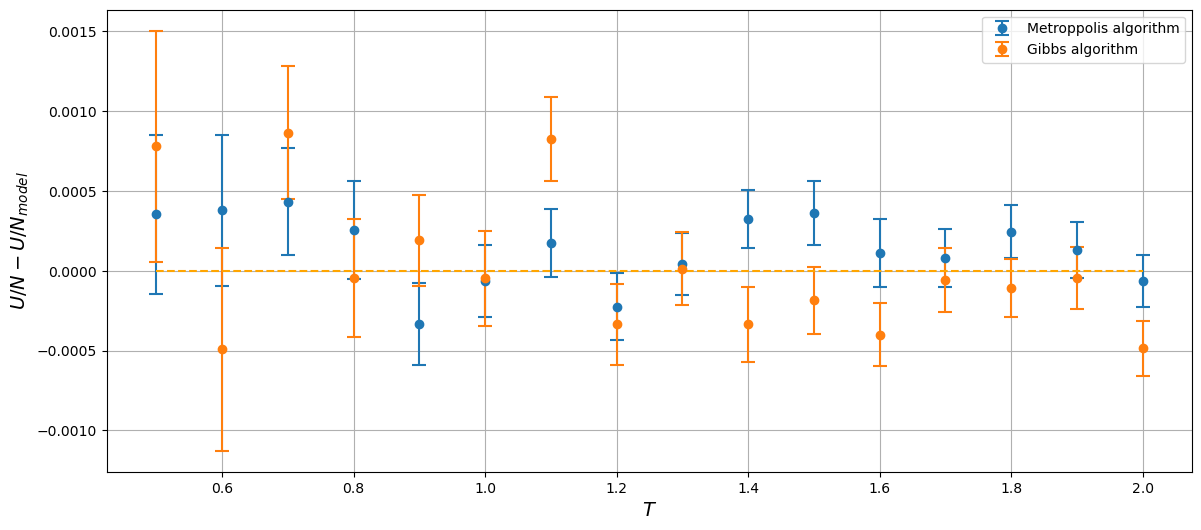

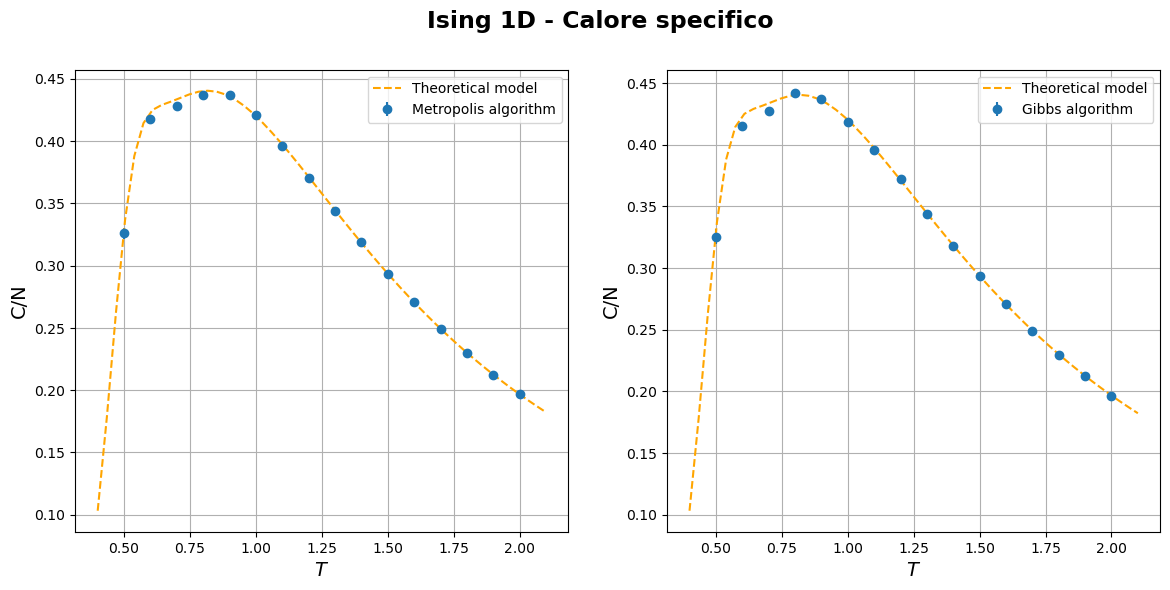

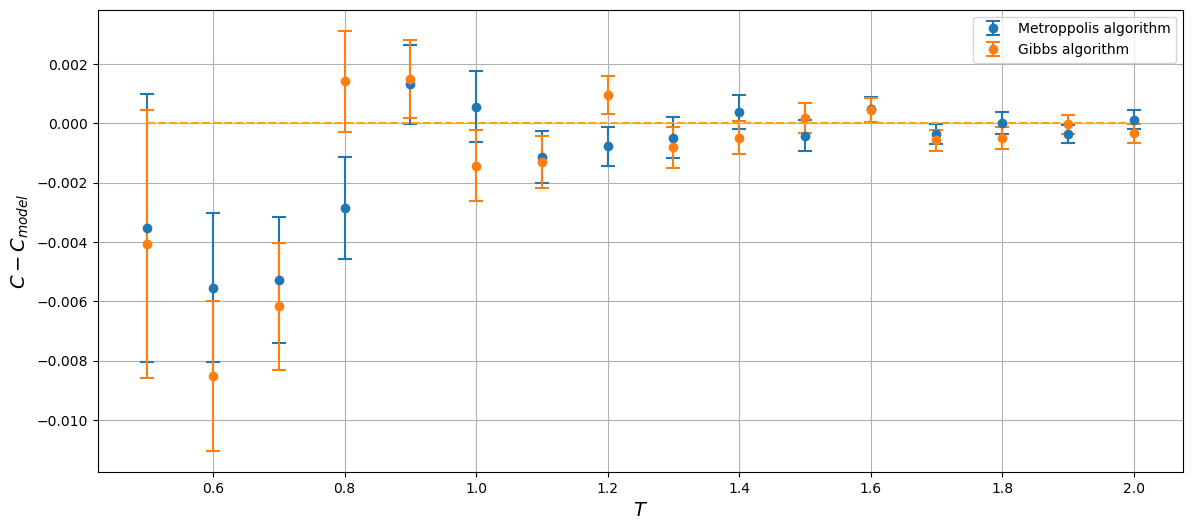

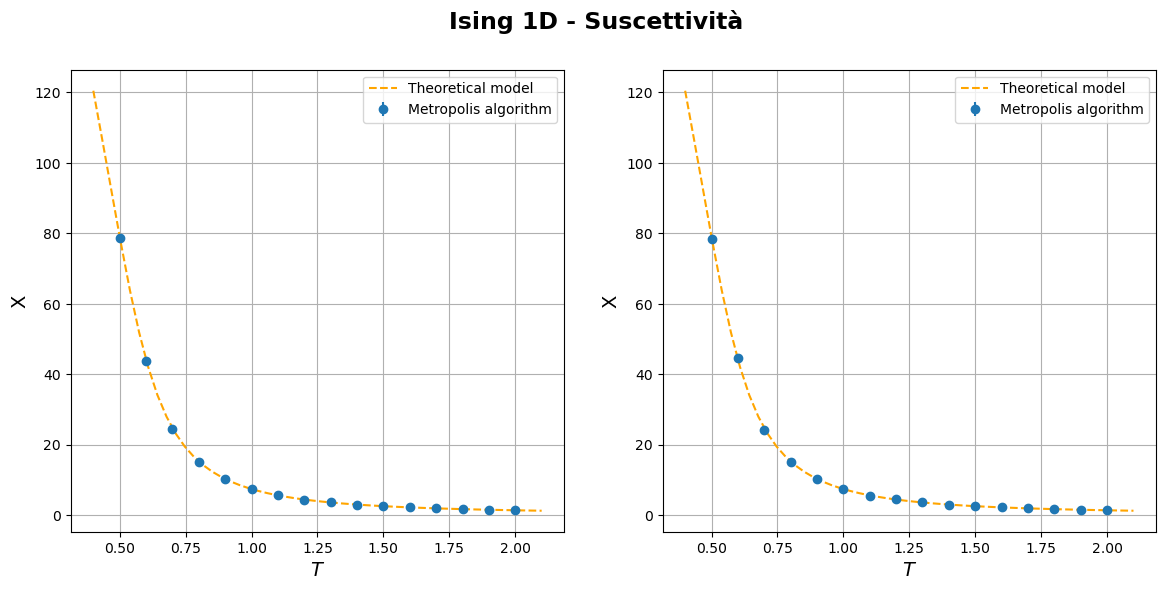

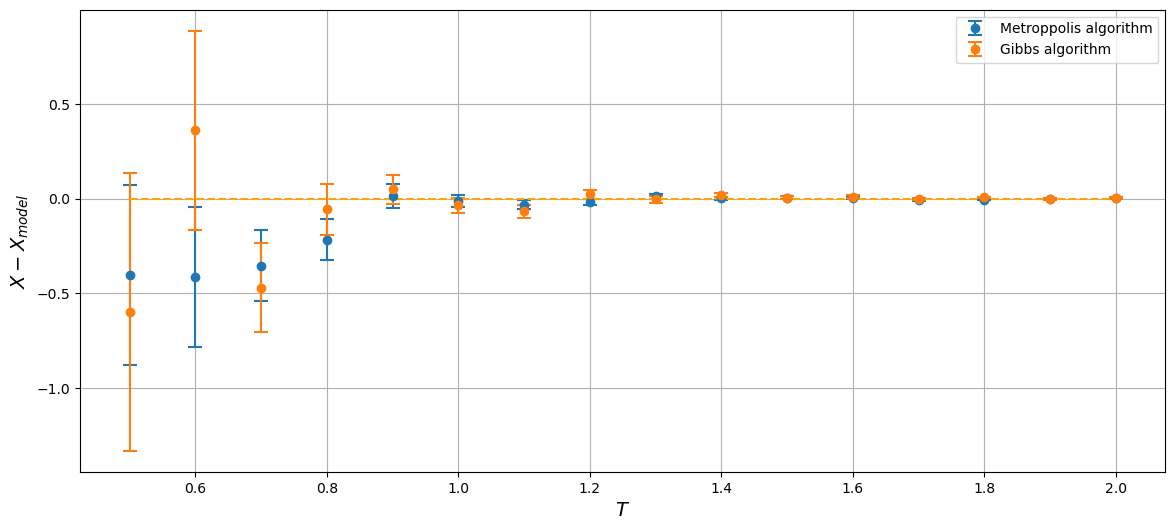

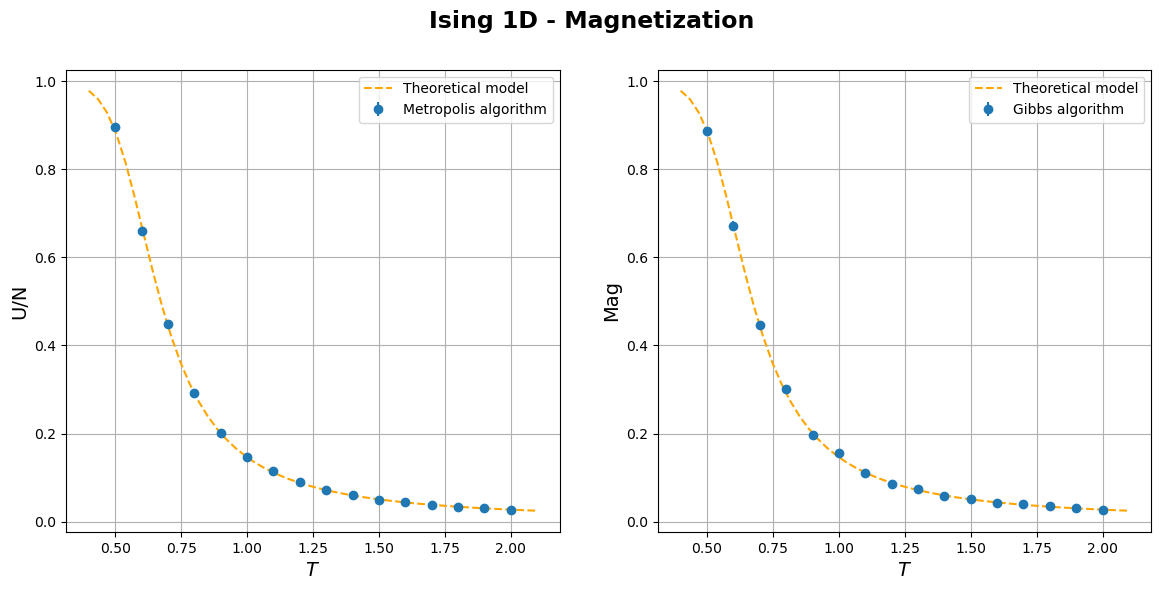

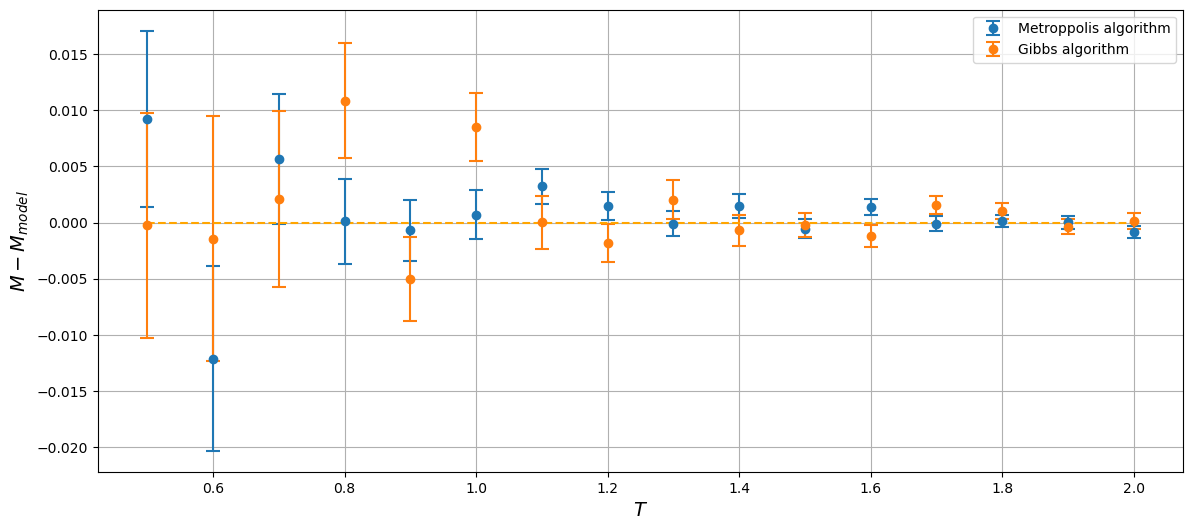

In [47]:
#define analytical solutions, load data
import matplotlib.pyplot as plt
import numpy as np

def Umodel(T,J,N):
    beta = 1/T
    frac = (1+np.tanh(beta*J)**(N-2))/(1+np.tanh(beta*J)**N)
    return -J*np.tanh(beta*J)*frac

def ChiModel(T,J,N):
    beta = 1/T
    tanhN = np.tanh(beta*J)**N
    return beta*np.exp(2*beta*J)*(1-tanhN)/(1+tanhN)

def HeatModel(T,J,N):
    beta = 1/T
    th = np.tanh(J/T)
    thN= th**N
    ch = 1/th
    heat=((beta*J)**2)*(((1+thN+(N-1)*(th**2)+(N-1)*(ch**2)*thN)/(1+thN))-N*((th+ch*thN)/(1+thN))**2)
    return heat

def MagModel(T,J,N,h):
    b=1./T
    l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    Z = l1**N + l2**N
    M = (np.exp(b*J)*np.sinh(b*h)*((l1**(N-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(N-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
    return(M)

x  = np.linspace(0.4,2.1)
yU = Umodel(x,1.,50.)
yX = ChiModel(x,1.,50.)
yH = HeatModel(x,1.,50.)
yM = MagModel(x,1.,50.,0.02)
zero = np.zeros(x.size)

#Metropolis data
metroT=np.loadtxt('metropolis/EnediT.dat',unpack=True, usecols=(4))
metroU,metroerrU= np.loadtxt('metropolis/EnediT.dat',unpack=True, usecols=(2,3))
metroC,metroerrC= np.loadtxt('metropolis/HeatdiT.dat',unpack=True, usecols=(2,3))
metroX,metroerrX = np.loadtxt('metropolis/ChidiT.dat',unpack=True, usecols=(2,3)) ### h=0.
metroM,metroerrM = np.loadtxt('metropolis/MagdiTok.dat',unpack=True,usecols=(2,3)) ### h=0.02


#Gibbs data
gibbsU,gibbserrU= np.loadtxt('gibbs/EnediT.dat',unpack=True, usecols=(2,3))
gibbsC,gibbserrC= np.loadtxt('gibbs/HeatdiT.dat',unpack=True, usecols=(2,3))
gibbsX,gibbserrX = np.loadtxt('gibbs/ChidiT.dat',unpack=True, usecols=(2,3)) ### h=0.
gibbsM,gibbserrM = np.loadtxt('gibbs/MagdiTok.dat',unpack=True,usecols=(2,3)) ### h=0.02


#Energia Interna
plt.figure(figsize=(14,6))
plt.suptitle('Ising 1D - Internal energy/particle',weight='bold',fontsize=17)

#plotting data
plt.subplot(121)
plt.errorbar(metroT,metroU,metroerrU,label='Metropolis algorithm',fmt='o')
plt.plot(x,yU,'--',label='Theoretical model',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('U/N',fontsize=14)
plt.legend()

plt.subplot(122)
plt.errorbar(metroT,gibbsU,gibbserrU,label='Gibbs algorithm',fmt='o')
plt.plot(x,yU,'--',label='Theoretical model',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('U/N',fontsize=14)
plt.legend()




#compatibility test
plt.figure(figsize=(14,6))
plt.errorbar(metroT,metroU-Umodel(metroT,1.,50.),metroerrU,label='Metroppolis algorithm',fmt='o',capsize=5, capthick=1.5)
plt.errorbar(metroT,gibbsU-Umodel(metroT,1.,50.),gibbserrU,label='Gibbs algorithm',fmt='o',capsize=5, capthick=1.5)

plt.plot(metroT,np.zeros(metroT.size),'--',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('$U/N - U/N_{model}$',fontsize=14)
plt.legend()







#Calore specifico

plt.figure(figsize=(14,6))
plt.suptitle('Ising 1D - Calore specifico',weight='bold',fontsize=17)

#plotting data
plt.subplot(121)
plt.errorbar(metroT,metroC,metroerrC,label='Metropolis algorithm',fmt='o')
plt.plot(x,yH,'--',label='Theoretical model',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('C/N',fontsize=14)
plt.legend()

plt.subplot(122)
plt.errorbar(metroT,gibbsC,gibbserrC,label='Gibbs algorithm',fmt='o')
plt.plot(x,yH,'--',label='Theoretical model',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('C/N',fontsize=14)
plt.legend()




#compatibility test
plt.figure(figsize=(14,6))
plt.errorbar(metroT,metroC-HeatModel(metroT,1.,50.),metroerrC,label='Metroppolis algorithm',fmt='o',capsize=5, capthick=1.5)
plt.errorbar(metroT,gibbsC-HeatModel(metroT,1.,50.),metroerrC,label='Gibbs algorithm',fmt='o',capsize=5, capthick=1.5)

plt.plot(metroT,np.zeros(metroT.size),'--',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('$C - C_{model}$',fontsize=14)
plt.legend()




#Suscettività

plt.figure(figsize=(14,6))
plt.suptitle('Ising 1D - Suscettività',weight='bold',fontsize=17)

#plotting data
plt.subplot(121)
plt.errorbar(metroT,metroX,metroerrX,label='Metropolis algorithm',fmt='o')
plt.plot(x,yX,'--',label='Theoretical model',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('X',fontsize=14)
plt.legend()

plt.subplot(122)
plt.errorbar(metroT,gibbsX,gibbserrX,label='Metropolis algorithm',fmt='o')
plt.plot(x,yX,'--',label='Theoretical model',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('X',fontsize=14)
plt.legend()


#compatibility test
plt.figure(figsize=(14,6))
plt.errorbar(metroT,metroX-ChiModel(metroT,1.,50.),metroerrX,label='Metroppolis algorithm',fmt='o',capsize=5, capthick=1.5)
plt.errorbar(metroT,gibbsX-ChiModel(metroT,1.,50.),gibbserrX,label='Gibbs algorithm',fmt='o',capsize=5, capthick=1.5)

plt.plot(metroT,np.zeros(metroT.size),'--',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('$X - X_{model}$',fontsize=14)
plt.legend()





#Magnetizzazione

plt.figure(figsize=(14,6))
plt.suptitle('Ising 1D - Magnetization',weight='bold',fontsize=17)

#plotting data
plt.subplot(121)
plt.errorbar(metroT,metroM,metroerrM,label='Metropolis algorithm',fmt='o')
plt.plot(x,yM,'--',label='Theoretical model',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('M',fontsize=14)
plt.legend()

plt.subplot(122)
plt.errorbar(metroT,gibbsM, gibbserrM,label='Gibbs algorithm',fmt='o')
plt.plot(x,yM,'--',label='Theoretical model',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('M',fontsize=14)
plt.legend()



#compatibility test
plt.figure(figsize=(14,6))
plt.errorbar(metroT,metroM-MagModel(metroT,1.,50.,0.02),metroerrM,label='Metroppolis algorithm',fmt='o',capsize=5, capthick=1.5)
plt.errorbar(metroT,gibbsM-MagModel(metroT,1.,50.,0.02),gibbserrM,label='Gibbs algorithm',fmt='o',capsize=5, capthick=1.5)
plt.plot(metroT,np.zeros(metroT.size),'--',color='orange')
plt.grid(True)
plt.xlabel('$T $',fontsize=14)
plt.ylabel('$M - M_{model}$',fontsize=14)
plt.legend()





I risultati delle simulazioni sono state confrontati con la soluzione analitica senza riscontrare particolari discrepanze al di là delle fluttuazioni statistiche